#### Homework 2
Since we are using R in Data730, I will continue that trend in order to get more practice using R. 

## Q1: Two Sample T-Test

In [16]:
# Create numeric vectors from the data supplied
A <- c(14,15,15,16,15,8,14,17,16,14,19,20,21,15,15,18,16,12,14,12)
B <- c(15,17,14,17,13,9,10,19,19,14,17,22,23,17,13,16,14,18,25,13)

In [17]:
t.test(A, B, alternative = "two.sided", mu = 0, paired = FALSE, var.equal = FALSE, conf.level = 0.95)


	Welch Two Sample t-test

data:  A and B
t = -0.84708, df = 34.445, p-value = 0.4028
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -3.228079  1.328079
sample estimates:
mean of x mean of y 
    15.30     16.25 


#### We fail to reject the null hypothesis. The means are not significantly different.

## Q2: Two Sample T-Test

In [18]:
#Create a matrix from scratch without the 
Input =(
"Salary.Type High.Salary Medium.Salary Low.Salary 
State_A 25 45 10
State_B 5 50 60
State_C 50 30 25
")

# convert the text string into a table with a header row of labels and a first column of row labels
data_matrix = as.matrix(read.table(textConnection(Input),
                              header=TRUE, 
                              row.names=1))

In [19]:
data_matrix

,High.Salary,Medium.Salary,Low.Salary
State_A,25,45,10
State_B,5,50,60
State_C,50,30,25


In [20]:
chisq.test(data_matrix, correct=FALSE) 


	Pearson's Chi-squared test

data:  data_matrix
X-squared = 74.493, df = 4, p-value = 2.55e-15


#### Since the p-value is smaller than a confidence level of 95% (alpha=.05), we can reject the null hypothesis and say that the state is not independent of the salary level.

## Q3: Linear Regression & Polynomial Regression

#### Linear Regression Model

In [21]:
library('tidyverse')
library('tidymodels')

theme_set(theme_grey(base_size = 14))
options(repr.plot.height = 4, repr.plot.width = 6)

In [22]:
#load the data
data = read.csv("Homework 2/linear_reg_data.csv")
data

i,Temperature,Yield
<int>,<int>,<dbl>
1,50,3.3
2,50,2.8
3,50,2.9
4,70,2.3
5,70,2.6
6,70,2.1
7,80,2.5
8,80,2.9
9,80,2.4


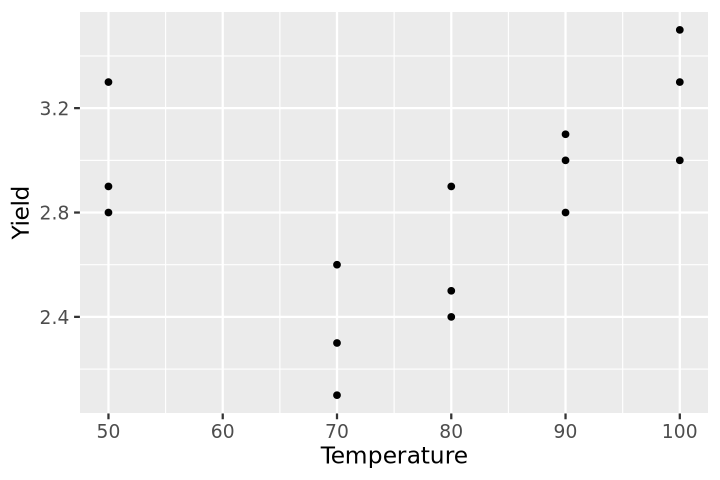

In [23]:
ggplot(data, aes(x = Temperature, y = Yield)) +
    geom_point()

In [24]:
# fill in the formula below
mod = linear_reg() |> set_engine('lm')

mod_fit = mod |> fit(Yield ~ Temperature, data = data)

tidy(mod_fit)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),2.306306306,0.469075251,4.916709,0.0002816012
Temperature,0.006756757,0.005872624,1.150552,0.2706412680


In [25]:
# The predict function takes a table with predictors and predicts outcomes given our model 
 
predict(mod_fit, new_data = data) |> head()

.pred
<dbl>
2.644144
2.644144
2.644144
2.779279
2.779279
2.779279


In [26]:
data2 = augment(mod_fit, data)

data2 |> head()

.pred,.resid,i,Temperature,Yield
<dbl>,<dbl>,<int>,<int>,<dbl>
2.644144,0.6558559,1,50,3.3
2.644144,0.1558559,2,50,2.8
2.644144,0.2558559,3,50,2.9
2.779279,-0.4792793,4,70,2.3
2.779279,-0.1792793,5,70,2.6
2.779279,-0.6792793,6,70,2.1


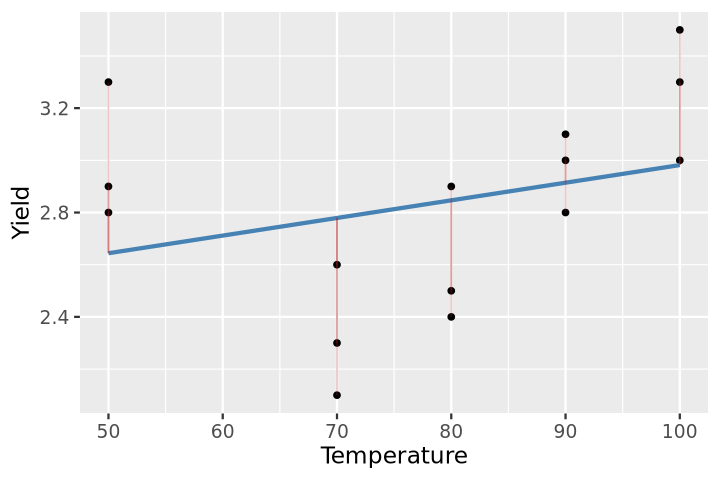

In [27]:
ggplot(data2) +
    geom_point(aes(x = Temperature, y = Yield)) + 
    geom_line(aes(x = Temperature, y = .pred), color = 'steelblue', linewidth = 1.2) +
    geom_segment(aes(x = Temperature, xend = Temperature, y = .pred, yend = Yield), 
                 color = 'firebrick',
                 alpha = 0.25)

#### Polynomial Model
Wasn't as well versed in this part of the question, so I followed this article to obtain my polynomial results: https://www.statology.org/polynomial-regression-r/

In [28]:
#randomly shuffle data
data.shuffled <- data[sample(nrow(data)),]

#define number of folds to use for k-fold cross-validation
K <- 10 

#define degree of polynomials to fit
degree <- 4

#create k equal-sized folds
folds <- cut(seq(1,nrow(data.shuffled)),breaks=K,labels=FALSE)

#create object to hold MSE's of models
mse = matrix(data=NA,nrow=K,ncol=degree)

#Perform K-fold cross validation
for(i in 1:K){
    
    #define training and testing data
    testIndexes <- which(folds==i,arr.ind=TRUE)
    testData <- data.shuffled[testIndexes, ]
    trainData <- data.shuffled[-testIndexes, ]
    
    #use k-fold cv to evaluate models
    for (j in 1:degree){
        fit.train = lm(Yield ~ poly(Temperature,j), data=trainData)
        fit.test = predict(fit.train, newdata=testData)
        mse[i,j] = mean((fit.test-testData$Yield)^2) 
    }
}

#find MSE for each degree 
colMeans(mse)

[1] 0.14879167 0.08921295 0.07786976 0.09000000

In [29]:
#fit best model
best = lm(Yield ~ poly(Temperature,3, raw=T), data=data)

#view summary of best model
summary(best)


Call:
lm(formula = Yield ~ poly(Temperature, 3, raw = T), data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.26541 -0.18255 -0.03648  0.18160  0.30629 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)  
(Intercept)                     2.105e+01  8.222e+00   2.560   0.0265 *
poly(Temperature, 3, raw = T)1 -7.143e-01  3.500e-01  -2.041   0.0660 .
poly(Temperature, 3, raw = T)2  8.766e-03  4.785e-03   1.832   0.0941 .
poly(Temperature, 3, raw = T)3 -3.401e-05  2.114e-05  -1.609   0.1359  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2297 on 11 degrees of freedom
Multiple R-squared:  0.7355,	Adjusted R-squared:  0.6633 
F-statistic: 10.19 on 3 and 11 DF,  p-value: 0.001656


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


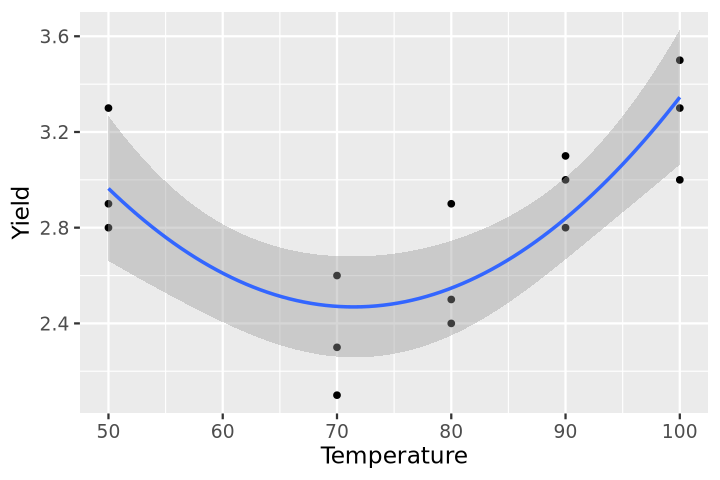

In [30]:
ggplot(data, aes(x=Temperature, y=Yield)) + 
          geom_point() +
          stat_smooth(method='lm', formula = y ~ poly(x,2), size = 1) + 
          xlab('Temperature') +
          ylab('Yield')

## Q4: “Problem With Numerics” 

#### In order to run summary statistics to the list of numbers provided, we will convert the list to a vector, and then run the summary function

In [31]:
#create vector
v1 <- c( 12, 25, 7, 5, 10, 23, 5, 6, 27, 3, 13, 13, 10, 18, 5)

#get summary stats
summary(v1)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   3.00    5.50   10.00   12.13   15.50   27.00 

#### Now let's change the value of 3 by multiplying by 2, then by 20

In [32]:
#creating new number because why not
x = 3*2*20

#create new vector with 3 replaced by x
v2 <- c( 12, 25, 7, 5, 10, 23, 5, 6, 27, x, 13, 13, 10, 18, 5)

#get summary stats
summary(v2)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   5.00    6.50   12.00   19.93   20.50  120.00 

After increasing the value 3 by a significant amount, all of the summary statistics change. We could assume since the new value is an outlier that the mean is no longer a helpful indicator of the shape of the data. We would probably prefer using the median. 

## Q5: Data Visualizations

For this exercise, I will be using the data from question 3, Temperature vs Yield. 

In [50]:
data |> head()

,i,Temperature,Yield
,<int>,<int>,<dbl>
1,1,50,3.3
2,2,50,2.8
3,3,50,2.9
4,4,70,2.3
5,5,70,2.6
6,6,70,2.1


In [35]:
summary(data)

       i         Temperature      Yield      
 Min.   : 1.0   Min.   : 50   Min.   :2.100  
 1st Qu.: 4.5   1st Qu.: 70   1st Qu.:2.550  
 Median : 8.0   Median : 80   Median :2.900  
 Mean   : 8.0   Mean   : 78   Mean   :2.833  
 3rd Qu.:11.5   3rd Qu.: 90   3rd Qu.:3.050  
 Max.   :15.0   Max.   :100   Max.   :3.500  

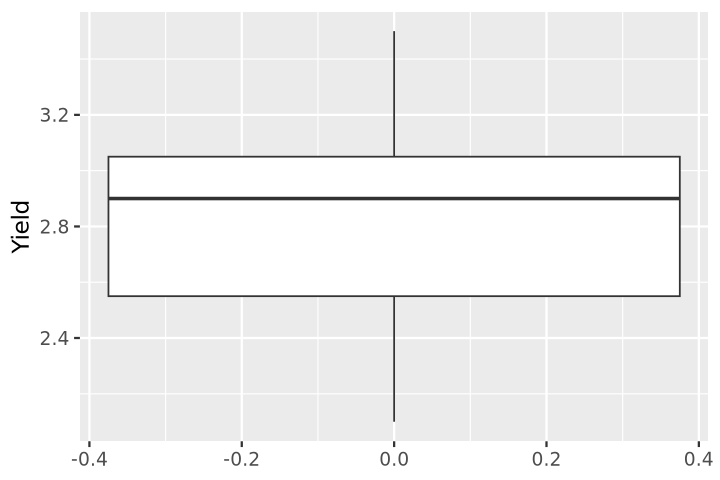

In [63]:
ggplot(data, aes(y = Yield)) + 
    geom_boxplot()

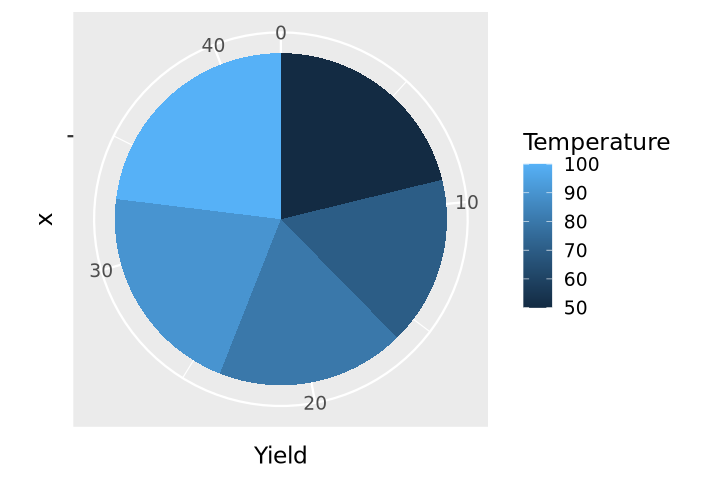

In [74]:
ggplot(data, aes(x="",y=Yield,fill=Temperature)) +
  geom_bar(stat="identity", width=1) +
  coord_polar("y", start=0)

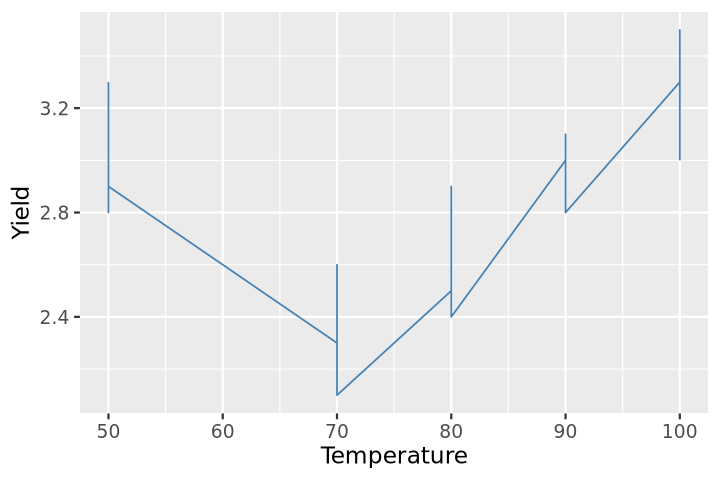

In [71]:
ggplot(data, aes(x = Temperature, y = Yield)) + 
    geom_line(color = 'steelblue')

#### Not very useful...

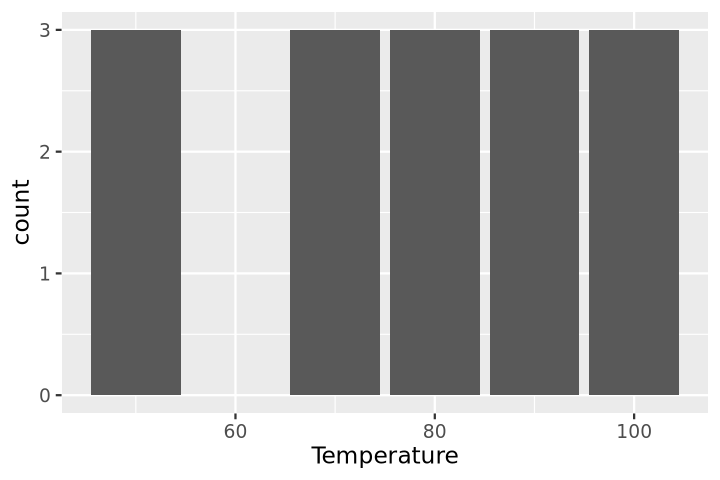

In [59]:
ggplot(data = data,aes(x=Temperature)) +
    geom_bar()